In [435]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [436]:
df=pd.read_csv('medical_cost_insurance.csv')

In [437]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


So in our dataset we have total 1388 entries and total 7 columns are present. Out of 7 cols 3 cols has object datatype

In [439]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

so here is no null values are present

In [440]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64


sex
male      676
female    662
Name: count, dtype: int64


bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


smoker
no     1064
yes     274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


charges
1639.56310     2
16884.92400    1
29

In [441]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


from this statistical summary we can see that our target col is right skewed and lots of outliers are present in this col

In [442]:
from sklearn.preprocessing import OrdinalEncoder

In [1]:
#Checking the no of unique values

In [443]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

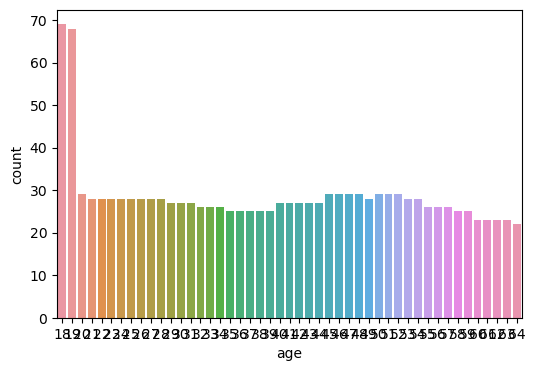

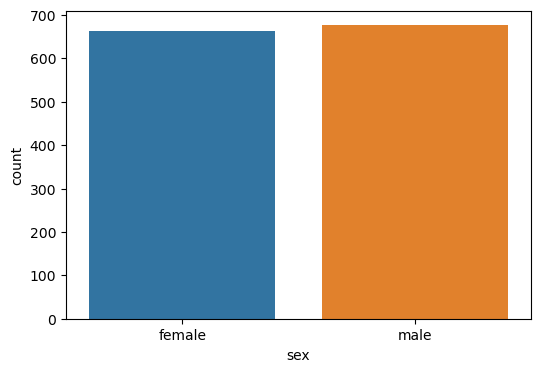

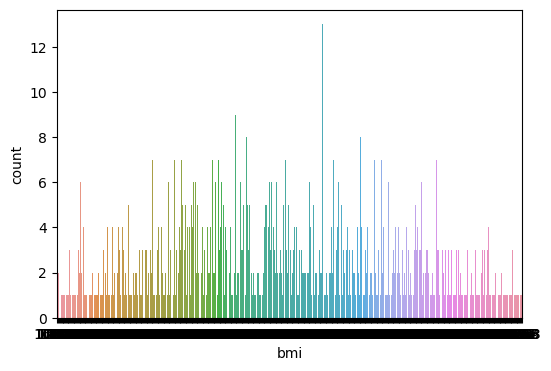

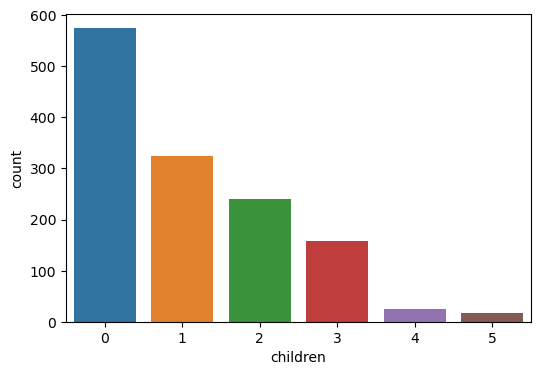

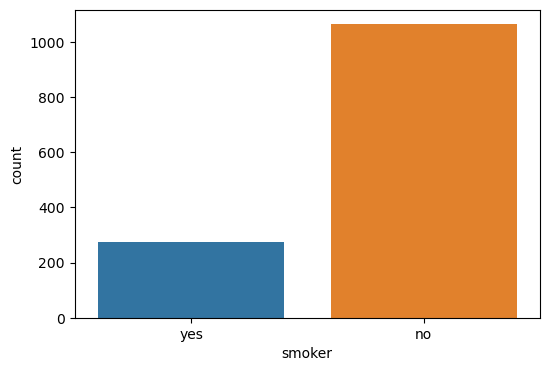

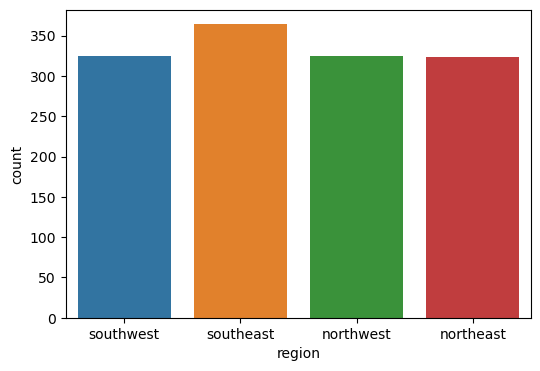

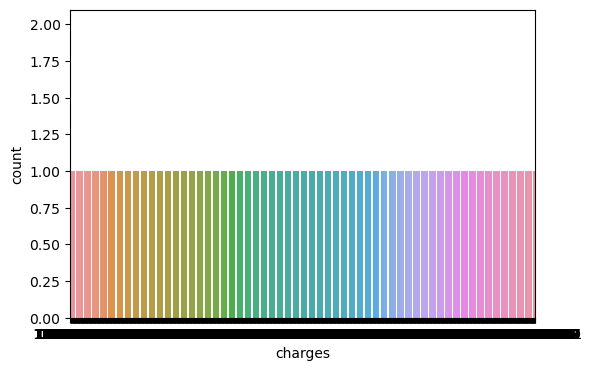

In [444]:
for i in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=i,data=df)
    plt.show()

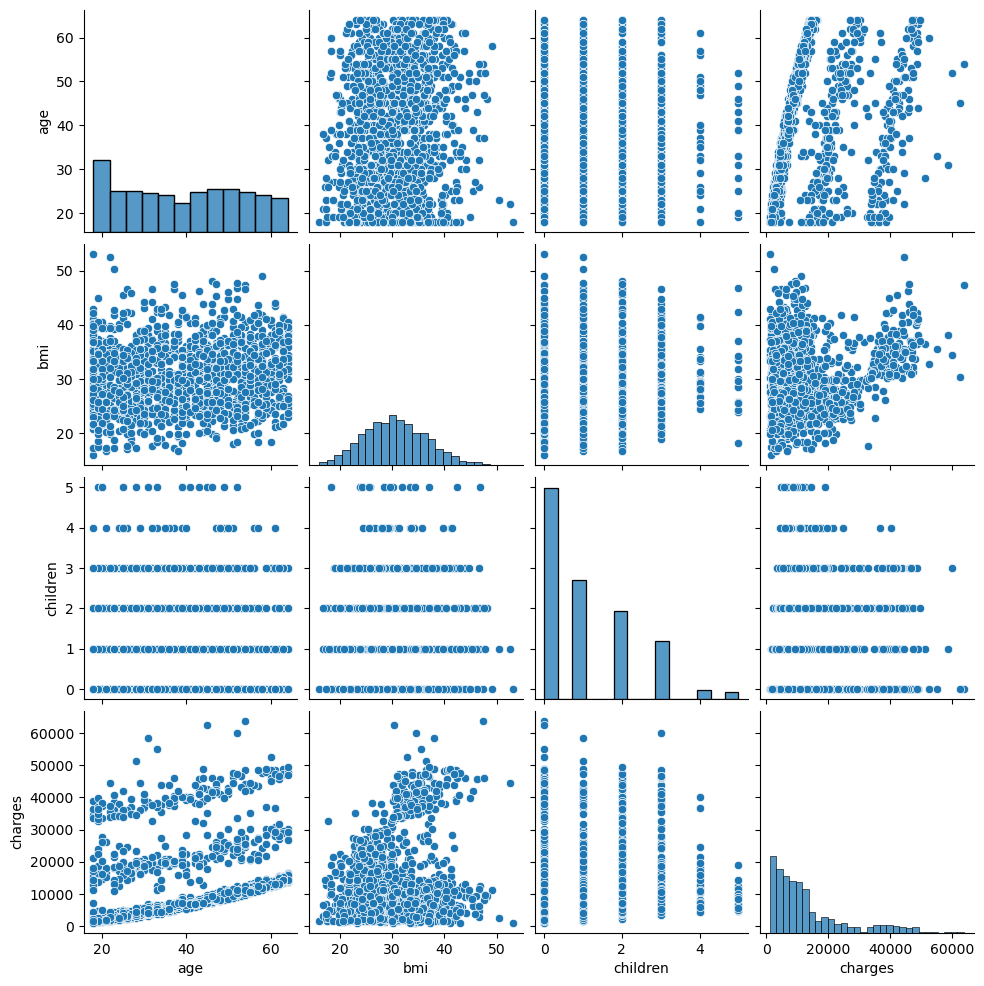

In [445]:
sns.pairplot(df)

From the pair plot we can see that the col age and charges has linear correlation but not so good 

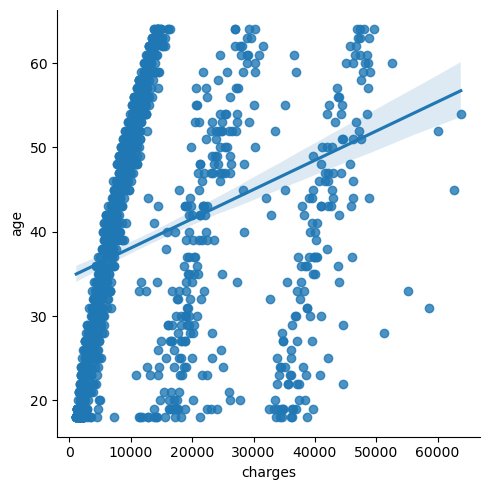

In [446]:
sns.lmplot(x='charges',y='age',data=df)

even though it has linear relationship but values are too scattered

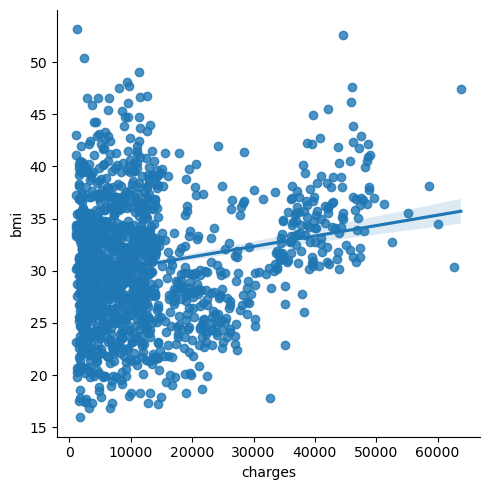

In [447]:
sns.lmplot(x='charges',y='bmi',data=df)

Same for bmi also

In [2]:
# Separating categorical & numerical columns

In [448]:
cat_col=[]
num_col=[]
for i in df.columns:
    if df.dtypes[i] == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)
print('categorical cols are :',cat_col)
print('\n')
print('num_cols are :',num_col)

categorical cols are : ['sex', 'smoker', 'region']


num_cols are : ['age', 'bmi', 'children', 'charges']


In [3]:
#Plotting the Dist plot

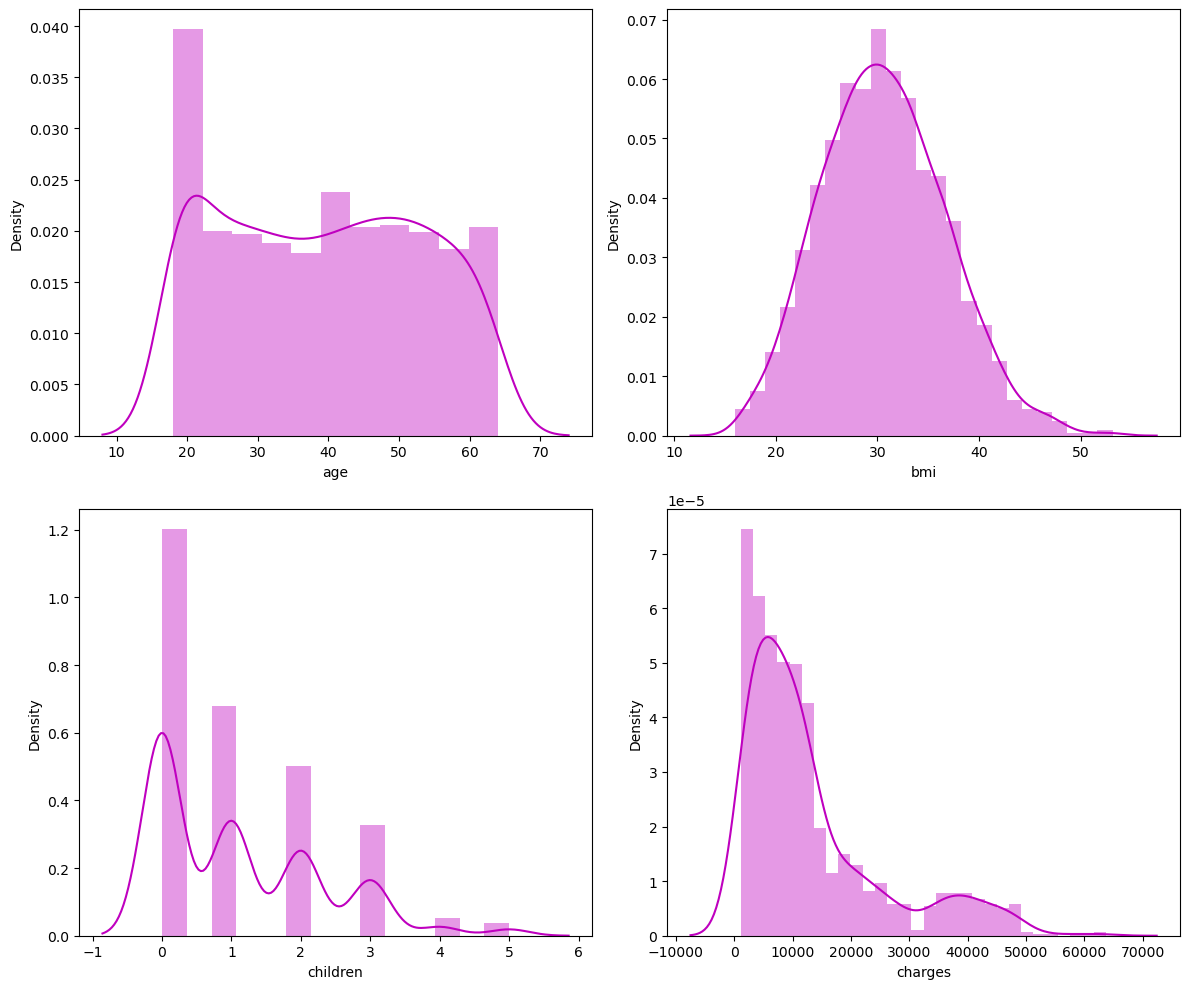

In [449]:
plt.figure(figsize=(12,10),facecolor='white')
p=1
for i in num_col:
    if p<=6:
        ax=plt.subplot(2,2,p)
        sns.distplot(df[i],color='m')
        plt.xlabel(i)
        plt.yticks(rotation=0)
    p+=1
plt.tight_layout()
    

From here we can see children and charges is right skewed

<Axes: xlabel='bmi', ylabel='charges'>

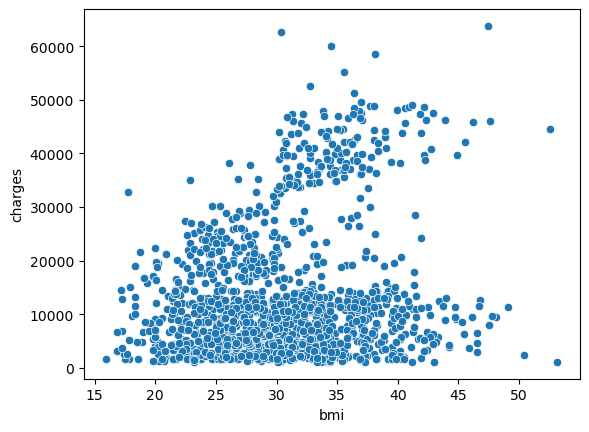

In [450]:
sns.scatterplot(y='charges',x="bmi",data=df,palette='bright')

charges and bmi are not properly linearly related

In [451]:
df[num_col].skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [452]:
from sklearn.preprocessing import OrdinalEncoder

In [453]:
OE=OrdinalEncoder()

Now changing the datatype from object to numeric by using OrdinalEncoder

In [4]:
# I am running a loop in all columns and checking their datatypes. If they are in object datatype then convert them into numeric datatype 

In [454]:
for i in df.columns:
    if df.dtypes[i]=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
        

In [455]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


Now all columns are in numeric datatype

In [5]:
#Checking the correlation and plot it into heatmap for better visualization

In [456]:
cor=df.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<Axes: >

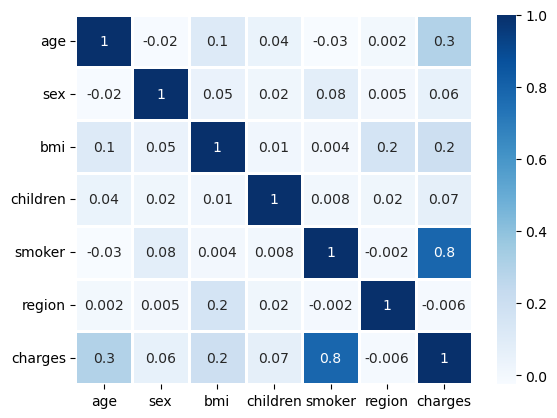

In [457]:
sns.heatmap(df.corr(),annot=True,linewidths=1,fmt='.1g',cmap='Blues')

From the correlation values with target variable we can see that region has very less correlation with targer variable

In [6]:
#Checking relation with charges to all columns

In [458]:
cor['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

In [459]:
#df.drop('region',axis=1,inplace=True)

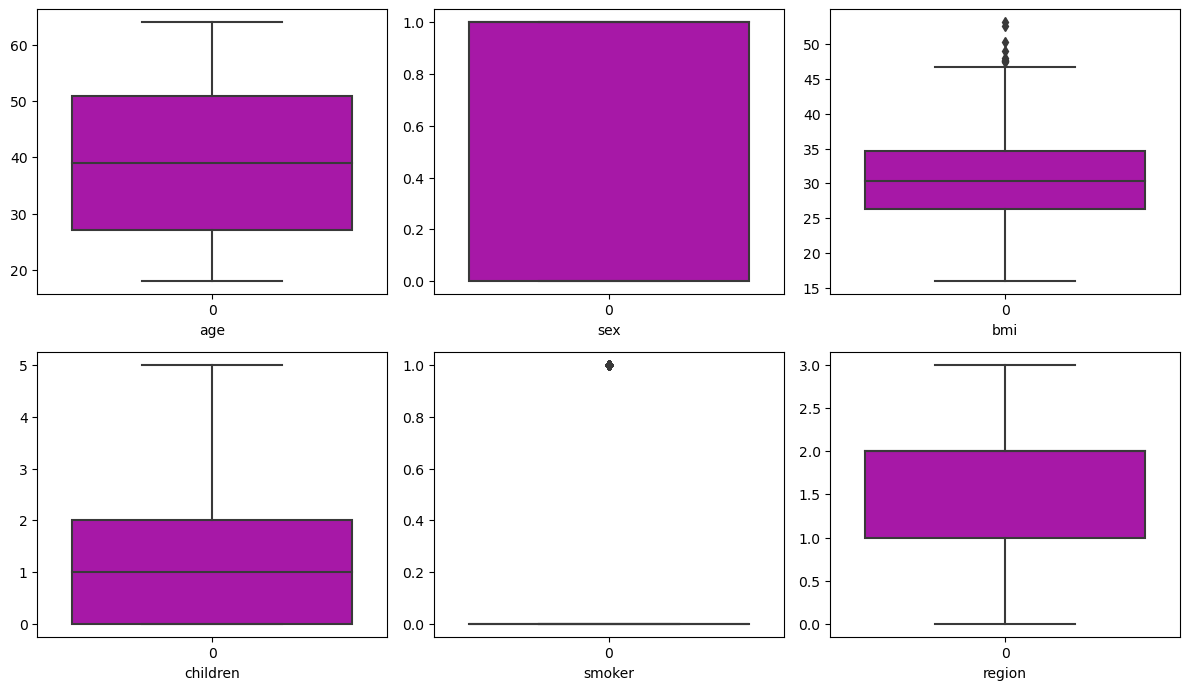

In [460]:
plt.figure(figsize=(12,10),facecolor='white')
p=1
for i in df.columns:
    if p<=6:
        ax=plt.subplot(3,3,p)
        sns.boxplot(df[i],color='m')
        plt.xlabel(i)
        plt.yticks(rotation=0)
    p+=1
plt.tight_layout()

So in bmi col little bit outliers are present

<Axes: >

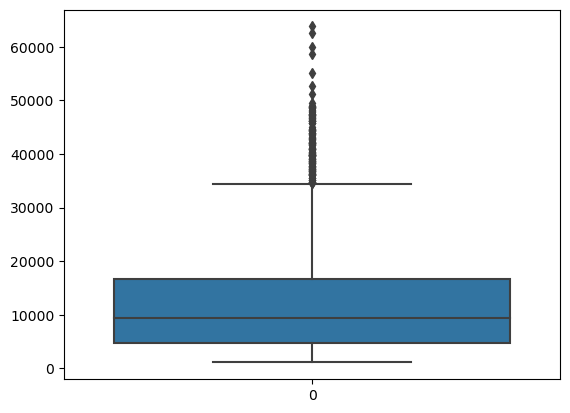

In [461]:
sns.boxplot(df['charges'])

target variable has lots of outliers present

In [462]:
d=['age', 'sex', 'bmi', 'children', 'smoker']

In [463]:
from scipy.stats import zscore
curr=df[d]

In [7]:
#Lets remove the outliers from all the columns by using zscore

In [1]:
#  I evaluate zscore for curr before but I did not get that much accuracy so I do it for all columns 

In [464]:
z=np.abs(zscore(df))

In [465]:
np.where(z>3)

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
        1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64),
 array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 6, 6, 3, 3, 6, 2], dtype=int64))

In [466]:
df_new=df[(z<3).all(axis=1)]

In [467]:
df_new

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


So previously we have 1338 rows are there now after removing the outliers we have 1309 rows are present

In [468]:
df=df_new

In [469]:
df.skew()

age         0.051340
sex        -0.010708
bmi         0.191432
children    0.738119
smoker      1.482731
region     -0.023027
charges     1.437160
dtype: float64

In [8]:
#removing the skewness by cuberoot technique

In [470]:
df['children']=np.cbrt(df['children'])

In [471]:
df.skew()

age         0.051340
sex        -0.010708
bmi         0.191432
children   -0.101389
smoker      1.482731
region     -0.023027
charges     1.437160
dtype: float64

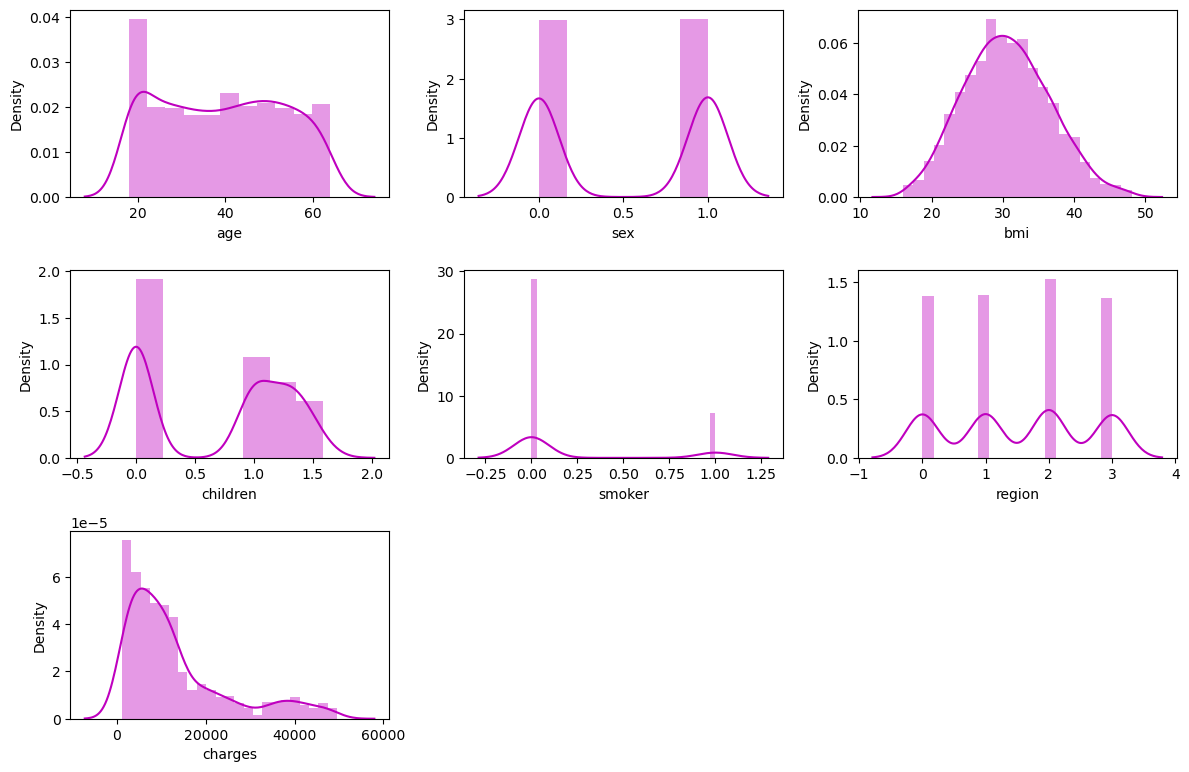

In [472]:
plt.figure(figsize=(12,10),facecolor='white')
p=1
for i in df.columns:
    if p<=7:
        ax=plt.subplot(4,3,p)
        sns.distplot(df[i],color='m')
        plt.xlabel(i)
        plt.yticks(rotation=0)
    p+=1
plt.tight_layout()

Except charges column every col has no skewness present

In [473]:
df.skew()

age         0.051340
sex        -0.010708
bmi         0.191432
children   -0.101389
smoker      1.482731
region     -0.023027
charges     1.437160
dtype: float64

In [474]:
#df['charges']=np.cbrt(df['charges'])

<Axes: >

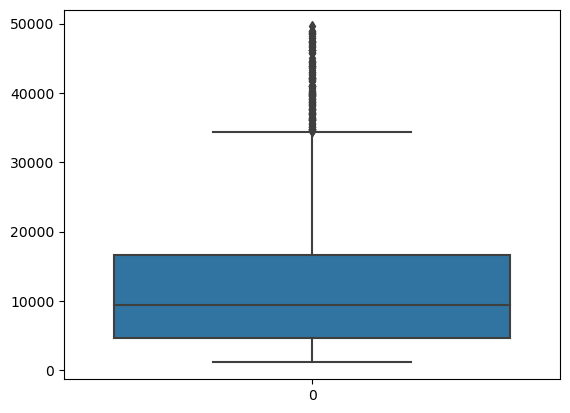

In [475]:
sns.boxplot(df['charges'])

In [9]:
#plotting regression plot to check the relationship between charges and all cols

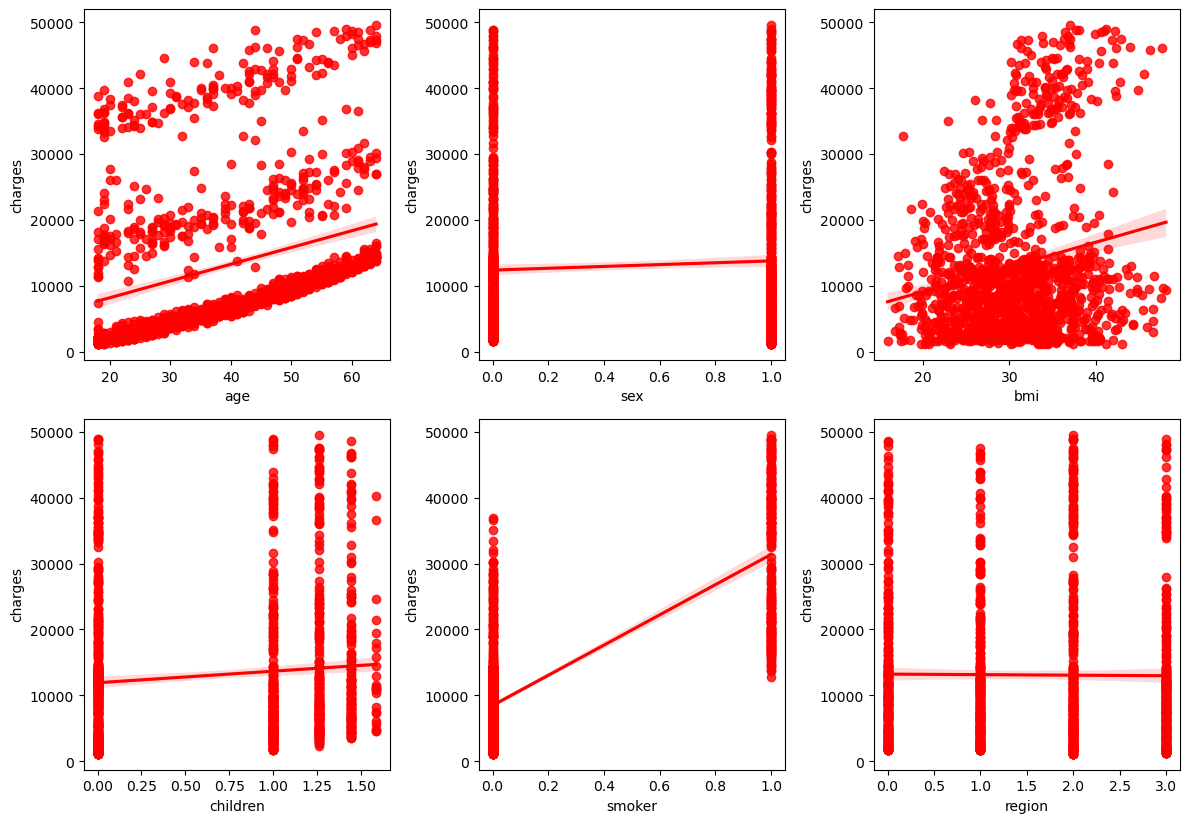

In [476]:
plt.figure(figsize=(12,12),facecolor='white')
plotnum=1
for i in df.columns:
    if plotnum<=6:
        ax=plt.subplot(3,3,plotnum)
        sns.regplot(x=i,y='charges',data=df,color='red')
        plt.xlabel(i)
    plotnum+=1
plt.tight_layout()

Not that much linearly related

In [477]:
from sklearn.preprocessing import StandardScaler

In [478]:
st=StandardScaler()

In [479]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

Using standard scaler to take the values are in normal distribution

In [480]:
x= pd.DataFrame(st.fit_transform(x),columns = x.columns)
x


,age,sex,bmi,children,smoker,region
0,-1.439063,-1.005362,-0.449359,-1.110618,1.984848,1.352753
1,-1.510086,0.994667,0.533391,0.528283,-0.503817,0.447460
2,-0.799859,0.994667,0.404478,1.253087,-0.503817,0.447460
3,-0.444746,0.994667,-1.319101,-1.110618,-0.503817,-0.457833
4,-0.515769,0.994667,-0.285288,-1.110618,-0.503817,-0.457833
...,...,...,...,...,...,...
1304,0.762639,0.994667,0.064617,1.253087,-0.503817,-0.457833
1305,-1.510086,-1.005362,0.223666,-1.110618,-0.503817,-1.363127
1306,-1.510086,-1.005362,1.049041,-1.110618,-0.503817,0.447460
1307,-1.297018,-1.005362,-0.800939,-1.110618,-0.503817,1.352753


In [481]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

Lets check the best random state by iterating it for 200 times. whenever it achive highest accuracy it will give us the value for random state 

In [482]:
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    RFR=RandomForestRegressor()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i

print('max accuracy is :',maxacc,'random state :',maxrs)


max accuracy is : 0.9156268853233417 random state : 108


In [10]:
#splitting our dataset for best random_state value

In [483]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=maxrs)

In [11]:
#I am importing all the regression models

In [484]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [485]:
LR=LinearRegression()
RD=Ridge()
LS=Lasso()
EN=ElasticNet()
svr=SVR()
DTR = DecisionTreeRegressor()
GB=GradientBoostingRegressor()
RFR=RandomForestRegressor()

In [12]:
#I make a list of all algorithmns

In [486]:
loop=[LR,RD,LS,EN,svr,DTR,GB,RFR]

In [487]:
from sklearn.model_selection import cross_val_score

Lets see which model gives us best result

In [501]:
for i in loop:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('This is for :',i)
    print('r2_score will be :',r2_score(y_test,pred))
    score=cross_val_score(i,x,y,cv=10)
    print(score)
    print('mean CV :',score.mean())
    print("difference between mean CV and r2_score will be :",r2_score(y_test,pred)-score.mean())
    print('\n')

This is for : LinearRegression()
r2_score will be : 0.8211782608245058
[0.79333282 0.72981842 0.73412144 0.68009799 0.75870163 0.80303078
 0.826071   0.63384956 0.7424052  0.78021876]
mean CV : 0.7481647579031278
difference between mean CV and r2_score will be : 0.07301350292137809


This is for : Ridge()
r2_score will be : 0.8210727011985458
[0.79329174 0.72983452 0.7341089  0.68022106 0.75862535 0.8029487
 0.82603082 0.63399546 0.74236886 0.7802566 ]
mean CV : 0.7481682012399226
difference between mean CV and r2_score will be : 0.07290449995862325


This is for : Lasso()
r2_score will be : 0.821177237952645
[0.79333662 0.72981892 0.73414315 0.68014304 0.75867334 0.80301024
 0.82606414 0.63386337 0.74241737 0.78021972]
mean CV : 0.7481689912871586
difference between mean CV and r2_score will be : 0.07300824666548633


This is for : ElasticNet()
r2_score will be : 0.7019550946383069
[0.69164933 0.65096037 0.64835136 0.63607476 0.65555313 0.69209535
 0.71869866 0.60141924 0.65152853 0.7

So gradient boosting will be the best model

In [13]:
#Hyperparameter tuning

In [489]:
from sklearn.model_selection import GridSearchCV

In [490]:
parameters={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],'learning_rate':[1,.1,.01,.001],'n_estimators':[100,150,200],'criterion':['friedman_mse', 'squared_error']}

In [491]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5,n_jobs=-1)

In [492]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [1, 0.1, 0.01, 0.001],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'n_estimators': [100, 150, 200]})

In [493]:
GCV.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'loss': 'huber',
 'n_estimators': 100}

In [494]:
final_model=GradientBoostingRegressor(criterion='squared_error',learning_rate=.1,loss='huber',n_estimators=100)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc= r2_score(y_test,pred)
print(acc*100)

94.36225785644223


So our model accuracy is 94% and very less overfitted

In [497]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0.00000,1.0,3.0,16884.92400
1,18,1.0,33.770,1.00000,0.0,2.0,1725.55230
2,28,1.0,33.000,1.44225,0.0,2.0,4449.46200
3,33,1.0,22.705,0.00000,0.0,1.0,21984.47061
4,32,1.0,28.880,0.00000,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,1.44225,0.0,1.0,10600.54830
1334,18,0.0,31.920,0.00000,0.0,0.0,2205.98080
1335,18,0.0,36.850,0.00000,0.0,2.0,1629.83350
1336,21,0.0,25.800,0.00000,0.0,3.0,2007.94500


Lets do some predictions

In [502]:
t=np.array([-1.439063,-1.005362,-0.449359	,-1.110618	,1.984848	,1.352753]).reshape(1,-1)

In [503]:
final_model.predict(t)

array([17702.88414713])

In [14]:
#16884.924

In [505]:
t=np.array([-0.799859	,0.994667	,0.404478	,1.253087	,-0.503817	,0.447460]).reshape(1,-1)
final_model.predict(t)

array([4532.75566594])

In [16]:
#4449.46